In [4]:
# import libraries
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd

import plotly.graph_objects as go

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

In [5]:
# perform runga-kutta method for a problem with 3 spacial dimensions (x and y, and z) 
# any function can be passed as input for the forces acting on the system.
def runga_kutta_3d(position, velocity, timestep, Fx, Fy, Fz, args_x, args_y, args_z):
    # position = (x_n, y_n, z_n): the x, y and z position at time n
    # velocity = (Vx_n, Vy_n, Vz_n): the velocity vector components for x, y and z at time n
    # timestep: delta(t), interval of time between 2 approximations
    # F_x: the derivative function for x component of velocity
    # F_y: the derivation function for y component of velocity
    # F_z: the derivation function for z component of velocity
    # args_x: arguments to be passed to F_x (in addition to Vx, Vy, Vz, x, y, z)
    # args_y: arguments to be passed to F_y (in addition to Vx, Vy, Vz, x, y, z)
    # args_z: arguments to be passed to F_z (in addition to Vx, Vy, Vz, x, y, z)
    
    x_values = []
    y_values = []
    z_values = []
    
    Vx_values = []
    Vy_values = []
    Vz_values = []
    
    Fx_values = []
    Fy_values = []
    Fz_values = []
    
    # step 1
    x_values.append(position[0])
    y_values.append(position[1])
    z_values.append(position[2])
    
    Vx_values.append(velocity[0])
    Vy_values.append(velocity[1])
    Vz_values.append(velocity[2])
    
    Fx_values.append(Fx(args_x, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    Fy_values.append(Fy(args_y, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    Fz_values.append(Fz(args_z, Vx_values[0], Vy_values[0], Vz_values[0], x_values[0], y_values[0], z_values[0]))
    
    # step 2
    x_values.append(x_values[0] + Vx_values[0] * timestep/2)
    y_values.append(y_values[0] + Vy_values[0] * timestep/2)
    z_values.append(z_values[0] + Vz_values[0] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[0] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[0] * timestep/2)
    Vz_values.append(Vz_values[0] + Fz_values[0] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    Fy_values.append(Fy(args_y, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    Fz_values.append(Fz(args_z, Vx_values[1], Vy_values[1], Vz_values[1], x_values[1], y_values[1], z_values[1]))
    
    # step 3
    x_values.append(x_values[0] + Vx_values[1] * timestep/2)
    y_values.append(y_values[0] + Vy_values[1] * timestep/2)
    z_values.append(z_values[0] + Vz_values[1] * timestep/2)
    
    Vx_values.append(Vx_values[0] + Fx_values[1] * timestep/2)
    Vy_values.append(Vy_values[0] + Fy_values[1] * timestep/2)
    Vz_values.append(Vz_values[0] + Fz_values[1] * timestep/2)
    
    Fx_values.append(Fx(args_x, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    Fy_values.append(Fy(args_y, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    Fz_values.append(Fz(args_z, Vx_values[2], Vy_values[2], Vz_values[2], x_values[2], y_values[2], z_values[2]))
    
    # step 4
    x_values.append(x_values[0] + Vx_values[2] * timestep)
    y_values.append(y_values[0] + Vy_values[2] * timestep)
    z_values.append(z_values[0] + Vz_values[2] * timestep)
    
    Vx_values.append(Vx_values[0] + Fx_values[2] * timestep)
    Vy_values.append(Vy_values[0] + Fy_values[2] * timestep)
    Vz_values.append(Vz_values[0] + Fz_values[2] * timestep)
    
    Fx_values.append(Fx(args_x, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    Fy_values.append(Fy(args_y, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    Fz_values.append(Fz(args_z, Vx_values[3], Vy_values[3], Vz_values[3], x_values[3], y_values[3], z_values[3]))
    
    # step 5
    x_final = x_values[0] + ((Vx_values[0] + 2*Vx_values[1] + 2*Vx_values[2] + Vx_values[3])*timestep)/6
    y_final = y_values[0] + ((Vy_values[0] + 2*Vy_values[1] + 2*Vy_values[2] + Vy_values[3])*timestep)/6
    z_final = z_values[0] + ((Vz_values[0] + 2*Vz_values[1] + 2*Vz_values[2] + Vz_values[3])*timestep)/6
    
    Vx_final = Vx_values[0] + ((Fx_values[0] +2*Fx_values[1] +2*Fx_values[2] + Fx_values[3])*timestep)/6
    Vy_final = Vy_values[0] + ((Fy_values[0] +2*Fy_values[1] +2*Fy_values[2] + Fy_values[3])*timestep)/6
    Vz_final = Vz_values[0] + ((Fz_values[0] +2*Fz_values[1] +2*Fz_values[2] + Fz_values[3])*timestep)/6
    
    return (x_final, y_final, z_final), (Vx_final, Vy_final, Vz_final)

def gravitational_force(args, Vx, Vy, Vz, x, y, z):
    n = args[0] # position of body in array of all bodies
    m = args[1] # mass array
    component = args[2] # "x", "y", or "z"
    x_all = args[3] # last x position of all bodies (array)
    y_all = args[4] # last x position of all bodies (array)
    z_all = args[5] # last x position of all bodies (array)
    G_or_const = args[6]
    
    F = 0
    
    # it s normal that it won't be equal at some point
#     if x != x_all[n] or y != y_all[n] or z != z_all[n]:
#         print("FALSE")
    
    for body in range(len(x_all)):
        if body != n:
            # claculate distance between 2 bodies
            r =  math.sqrt((x_all[body] - x)**2 + (y_all[body] - y)**2 + (z_all[body] - z)**2)
            # print("r:", r)
            if component == "x":
                F -= G_or_const * m[body] * ((x - x_all[body])/r**3)
            elif component == "y":
                F -= G_or_const * m[body] * ((y - y_all[body])/r**3)
            elif component == "z":
                F -= G_or_const * m[body] * ((z - z_all[body])/r**3)      
    return F

In [6]:
# universal gravitation constant
G = 6.67259e-20  # (km**3/kg/s**2)

input_file = "bodies2.csv"
output_trajectories = "blender/trajectories_step2.csv"
output_body_properties = "blender/body_properties2.csv"

In [7]:
df = pd.read_csv(input_file)
bodies = list(df['body'])
print(bodies)
df = df.set_index('body')
display(df)

n_bodies = len(df)
print(n_bodies)

['sun', 'earth', 'jupiter', 'saturn', 'neptune', 'uranus', 'venus', 'mars', 'mercury']


,x,y,z,Vx,Vy,Vz,mass
body,,,,,,,
sun,-1.355e+06,1.421e+04,3.144e+04,0.002,-0.016,8.962e-05,1.989e+30
earth,-2.682e+07,1.449e+08,2.413e+04,-29.815,-5.296,-5.494e-04,5.972e+24
jupiter,7.224e+08,1.564e+08,-1.681e+07,-2.913,13.384,9.666e-03,1.899e+27
saturn,1.217e+09,-8.235e+08,-3.415e+07,4.873,7.982,-3.327e-01,5.683e+26
neptune,4.451e+09,-4.402e+08,-9.351e+07,0.499,5.441,-1.236e-01,1.024e+26
uranus,1.999e+09,2.158e+09,-1.788e+07,-5.046,4.310,8.140e-02,8.681e+25
venus,8.259e+07,-6.916e+07,-5.762e+06,22.050,26.878,-9.029e-01,4.867e+24
mars,7.753e+06,2.338e+08,4.708e+06,-23.292,2.986,6.344e-01,6.416e+23
mercury,1.764e+07,4.206e+07,1.725e+06,-54.131,21.933,6.759e+00,3.285e+23


9


In [7]:
# non-dimentionalize code
# universal gravitation constant
G = 6.67259e-20  # (km**3/kg/s**2)
mass_sun = 1.989e30 # kg
AU = 1.496e8 #km
year = 3.156e7 #s
norm_const = (G * mass_sun * (year**2))/(AU**3)
print(norm_const)

# set array of masses and normalize
m = list(df["mass"])
m = [i/mass_sun for i in m]
print(m)

39.482844360900664
[1.000050276520865, 3.002513826043238e-06, 0.0009547511312217195, 0.0002857214680744092, 5.1483157365510307e-05, 4.364504776269483e-05, 2.4469582704876823e-06, 3.2257415786827553e-07, 1.65158371040724e-07]


In [8]:
# initial conditions: store in arrays
# NASA JBL 01/01/2023 for eath and sun (vector table)
# observer: solar system barycenter 

x = []
y = []
z = []

Vx = []
Vy = []
Vz = []

# NORMALIZE POSITIONS AND VELOCITIES TOO
for n in range(n_bodies):
    row = df.loc[bodies[n]]
    # print(row)
    x.append([row.x/AU])
    y.append([row.y/AU])
    z.append([row.z/AU])
    
    Vx.append([row.Vx*(year/AU)])
    Vy.append([row.Vy*(year/AU)])
    Vz.append([row.Vz*(year/AU)])
    
print("x:", x)
print("y:", y)
print("z:", z)
print("Vx:", Vx)
print("Vy:", Vy)
print("Vz:", Vz)

x: [[-0.009055016159966617], [-0.1793085625550183], [4.8291006685631475], [8.138215814399752], [29.75138566404254], [13.360498481186276], [0.5521040013798607], [0.051822082348051066], [0.11791618807725736]]
y: [[9.495630345800982e-05], [0.9685666471737507], [1.0453167199420428], [-5.504951619894438], [-2.9426746516096243], [14.426954287758068], [-0.46228718968658006], [1.562825907716532], [0.28112208900729396]]
z: [[0.00021015644618283588], [0.00016129686599527607], [-0.11237663331179339], [-0.2283016941828624], [-0.6250519716101802], [-0.11950533649100502], [-0.03851799114077272], [0.03146889384815788], [0.01152924029751236]]
Vx: [[0.00034519862016138184], [6.289811699774153], [-0.6145791407882866], [1.0279713308219738], [0.10534561718523733], [-1.0645635001897862], [4.651622703561451], [-4.9136727136113825], [-11.41965988591572]]
Vy: [[-0.0032874007978930778], [-1.1172406489022908], [2.8234895926957453], [1.683921697068667], [1.1479311005631836], [0.9092226448443977], [5.670265031639

In [9]:
n_timesteps = 365*165 # number of timesteps
timestep = 86400/year
print(timestep)

0.0027376425855513307


In [10]:
%%time

for t in range(n_timesteps):
    
    # set array with latest position for all bodies
    x_last_all = []
    y_last_all = []
    z_last_all = []
    for n in range(n_bodies):
        x_last_all.append(x[n][-1])
        y_last_all.append(y[n][-1])
        z_last_all.append(z[n][-1])
    
    for n in range(n_bodies):
        # for a specific body: p_components are its position, c_components are its velocity components
        p_components = (x_last_all[n], y_last_all[n], z_last_all[n])
        v_components = (Vx[n][-1], Vy[n][-1], Vz[n][-1])
        
        args_x = (n, m, "x", x_last_all, y_last_all, z_last_all, norm_const)
        args_y = (n, m, "y", x_last_all, y_last_all, z_last_all, norm_const)
        args_z = (n, m, "z", x_last_all, y_last_all, z_last_all, norm_const)
        
        p_components, v_components = runga_kutta_3d(p_components, v_components, timestep, gravitational_force, gravitational_force, gravitational_force, args_x, args_y, args_z)
        
        # add new value in arrays
        x[n].append(p_components[0])
        y[n].append(p_components[1])
        z[n].append(p_components[2])
        
        Vx[n].append(v_components[0])
        Vy[n].append(v_components[1])
        Vz[n].append(v_components[2])

CPU times: user 1min 6s, sys: 505 ms, total: 1min 6s
Wall time: 1min 7s


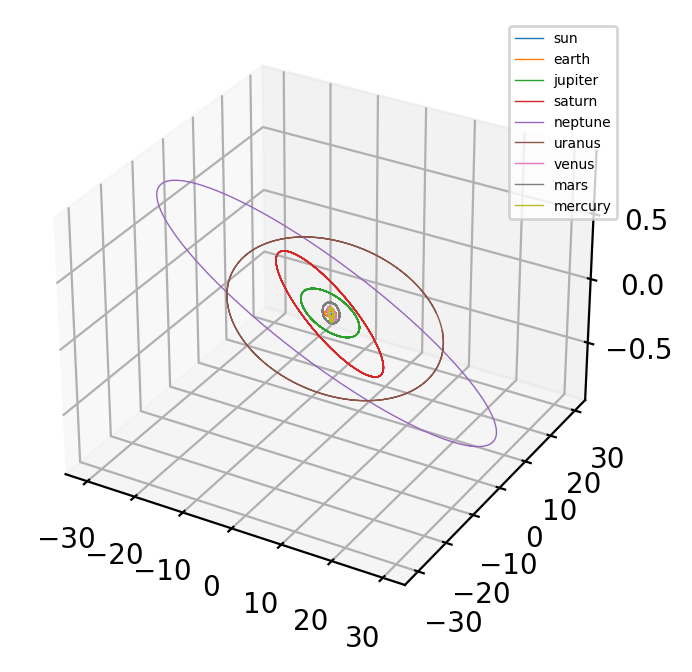

In [11]:
ax = plt.figure(dpi = 200).add_subplot(projection='3d')
# ax.set_aspect('equal')
for i in range(n_bodies):
    ax.plot(x[i], y[i], z[i], label = bodies[i], linewidth = 0.5)
# ax.set_zlim(0.0001, 0.0003)
ax.legend(fontsize="5")
plt.savefig("plot_runga_kutta.png")
# plt.savefig("earth_trajectory/earth_trajectory_%i_body_system_multiple_orbits.png"%(n_bodies))
plt.show()

In [193]:
df_result = pd.DataFrame()
for n in range(len(bodies)):
    df_result["x_%s"%(bodies[n])] =  x[n]
    df_result["y_%s"%(bodies[n])] =  y[n]
    df_result["z_%s"%(bodies[n])] =  z[n]
for body in bodies:
    df_result[body] = df_result["x_%s"%(body)].astype(str) + "_" + df_result["y_%s"%(body)].astype(str) + "_" + df_result["z_%s"%(body)].astype(str)
    df_result = df_result.drop(labels = ["x_%s"%(body), "y_%s"%(body), "z_%s"%(body)], axis = 1)
display(df_result) 

df_result.to_csv(output_trajectories, index = False)   

,sun,earth,jupiter,saturn,neptune,uranus,venus,mars,mercury
0,-0.009055016159966617_9.495630345800982e-05_0....,-0.1793085625550183_0.9685666471737507_0.00016...,4.8291006685631475_1.0453167199420428_-0.11237...,8.138215814399752_-5.504951619894438_-0.228301...,29.75138566404254_-2.9426746516096243_-0.62505...,13.360498481186276_14.426954287758068_-0.11950...,0.5521040013798607_-0.46228718968658006_-0.038...,0.051822082348051066_1.562825907716532_0.03146...,0.11791618807725736_0.28112208900729396_0.0115...
1,-0.009054064563354945_8.595783047464907e-05_0....,-0.1620635446938606_0.9653565664039611_0.00016...,4.827412273052706_1.0530451471660331_-0.112370...,8.14102876411868_-5.500340785882128_-0.2284938...,29.751673897841037_-2.939532010247092_-0.62512...,13.357583826564632_14.429443133287783_-0.11945...,0.5646217982614514_-0.44658880436896786_-0.039...,0.038368030180446974_1.5644900478934585_0.0318...,0.08606505656592522_0.29234934944998303_0.0153...
2,-0.009053099843649812_7.696191048069745e-05_0....,-0.14477002480071832_0.961840481436739_0.00016...,4.8257120852735325_1.0607710055571795_-0.11236...,8.143839176380007_-5.495728236216512_-0.228685...,29.75196180193833_-2.936389336315006_-0.625194...,13.354668651513398_14.431931416538752_-0.11941...,0.5766998591910176_-0.43054801447274454_-0.039...,0.024910331475935098_1.5660335078126884_0.0321...,0.05324954004038754_0.30061247951866377_0.0190...
3,-0.00905212202105378_6.79686241707329e-05_0.00...,-0.1274326790345028_0.9580137900966424_0.00016...,4.824000109297134_1.0684942762406477_-0.112358...,8.146647050117416_-5.4911139722114_-0.22887785...,29.75224937633056_-2.9332466298480835_-0.62526...,13.351752956133652_14.434419137400438_-0.11936...,0.5883288752005653_-0.4141770851436591_-0.0399...,0.011450030528103413_1.5674564471724277_0.0325...,0.01980074466509129_0.3058210777093065_0.02254...
4,-0.009051131118414482_5.897804489026878e-05_0....,-0.1100563822959525_0.9538718627196381_0.00016...,4.822276349228009_1.0762149403485948_-0.112352...,8.149452384265144_-5.486497995181278_-0.229069...,29.752536621013874_-2.930103890881041_-0.62533...,13.348836740526488_14.43690629576232_-0.119317...,0.5994998724547529_-0.39748853257748473_-0.040...,-0.0020118329879284594_1.5687590336283386_0.03...,-0.013940514540069657_0.3079347789669483_0.025...
...,...,...,...,...,...,...,...,...,...
361,-0.007948902538340259_-0.002878332461389042_0....,-0.2447413406123744_0.9751916235772714_0.00020...,3.506828786593338_3.5295832056119343_-0.093096...,8.980926021223611_-3.7396389377704518_-0.29253...,29.833986734003023_-1.806335127580386_-0.65035...,12.275292617456687_15.288042426854474_-0.10224...,-0.7267022502563708_0.00032073157819786924_0.0...,-0.3571049015585886_-1.4465138136174682_-0.021...,-0.18130995925625068_0.2679689360515318_0.0382...
362,-0.007944049208676139_-0.002885423189058148_0....,-0.22772166611158182_0.9731301600217236_0.0001...,3.5013876104473285_3.5352553865376355_-0.09299...,8.982758318957178_-3.734499307005222_-0.292694...,29.834155724541223_-1.8031829891750852_-0.6504...,12.272196834887765_15.290321234609374_-0.10219...,-0.7266224773120397_-0.020002485737210796_0.04...,-0.34295335637599905_-1.4485450904491_-0.02187...,-0.20988431788944_0.25273300645086616_0.039622...
363,-0.00793918887354377_-0.00289250499100287_0.00...,-0.2106370438476985_0.9707802617774581_0.00019...,3.495938047758881_3.540919110657431_-0.0928997...,8.984587734177307_-3.729358477920073_-0.292856...,29.834324384231465_-1.800030830771257_-0.65049...,12.269100569880575_15.292599441264374_-0.10214...,-0.7259730872455191_-0.04031212841919499_0.041...,-0.32877148066359857_-1.4504454952912036_-0.02...,-0.2367701609305717_0.23535679819507974_0.0406...
364,-0.007934321559595878_-0.002899577917927147_0....,-0.19349144827142495_0.9681374643329455_0.0001...,3.4904801125187754_3.5465743653851884_-0.09280...,8.986414266049884_-3.7242164520647996_-0.29301...,29.834492713071246_-1.7968786524038203_-0.6505...,12.266003822544606_15.29

In [219]:
# create body_properties file
r_sun = 695700 # km
r_earth = 6378 # km
r_jupiter = 71492
r_saturn = 58232
r_neptune = 24622
r_uranus = 25362
r_venus = 6052
r_mars = 3390
r_mercury = 2440

# sun = ["Yellow-255-255-0-1", float(r_sun/AU)]
# earth = ["Blue-0-0-255-1", float(r_earth/AU)]

# sun = ["Yellow-253-184-19-1", 0.1]
# earth = ["Green-159-193-100-1", 0.01]
# jupiter = ["Brown-211-156-126-1", 0.05]
# saturn = ["Caca-219-181-124-1", 0.04]
# neptune = ["Ocean-63-84-186-1", 0.03]
# uranus = ["Blue-98-174-231-1", 0.03]
# venus = ["Weird-238-203-139-1", 0.01]
# mars = ["Red-193-68-14-1", 0.008]
# mercury = ["Grey-173-168-165-1", 0.008]


sun = ["Yellow-253-184-19-1", 0.1]
earth = ["Green-159-193-100-1", 0.05]
jupiter = ["Brown-211-156-126-1", 0.05]
saturn = ["Caca-219-181-124-1", 0.05]
neptune = ["Ocean-63-84-186-1", 0.05]
uranus = ["Blue-98-174-231-1", 0.05]
venus = ["Weird-238-203-139-1", 0.05]
mars = ["Red-193-68-14-1", 0.05]
mercury = ["Grey-173-168-165-1", 0.05]



# sun = ["Yellow-40-38-0-1", 0.1]
# earth = ["Green-0.150-0.750-0.006-1", 0.05]
# jupiter = ["Brown-211-156-126-1", 0.05]
# saturn = ["Caca-219-181-124-1", 0.05]
# neptune = ["Ocean-63-84-186-1", 0.05]
# uranus = ["Blue-98-174-231-1", 0.05]
# venus = ["Weird-238-203-139-1", 0.05]
# mars = ["Red-193-68-14-1", 0.05]
# mercury = ["Grey-173-168-165-1", 0.05]

df_properties = pd.DataFrame()
df_properties["sun"] = sun
df_properties["earth"] = earth
df_properties["jupiter"] = jupiter
df_properties["saturn"] = saturn
df_properties["neptune"] = neptune
df_properties["uranus"] = uranus
df_properties["venus"] = venus
df_properties["mars"] = mars
df_properties["mercury"] = mercury
display(df_properties)

df_properties.to_csv(output_body_properties, index = False)

,sun,earth,jupiter,saturn,neptune,uranus,venus,mars,mercury
0,Yellow-253-184-19-1,Green-159-193-100-1,Brown-211-156-126-1,Caca-219-181-124-1,Ocean-63-84-186-1,Blue-98-174-231-1,Weird-238-203-139-1,Red-193-68-14-1,Grey-173-168-165-1
1,0.1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [203]:
def color(n):
    gamma = 1 / 2.2
    return  255 * pow(n / 255, gamma) # pow(value, power)

def to_blender_color(c):
    c = min(max(0, c), 255) / 255
    return c / 12.92 if c < 0.04045 else math.pow((c + 0.055) / 1.055, 2.4)
    
def from_blender_color(c):
    color = max(0.0, c * 12.92) if c < 0.0031308 else 1.055 * math.pow(c, 1.0 / 2.4) - 0.055
    return hex(max(min(int(color * 255 + 0.5), 255), 0))

In [206]:
print(211/255)


205.72796810280516
224.6714903278929
166.6284633730246
0.3467040563550296
0.5332764040105052
0.12743768043564743
0.9822505503331171
0.4793201831008268
0.006512090792594475


In [201]:
print(205.72796810280516/255)
print(224.6714903278929/255)
print(166.6284633730246/255)

0.8067763455011967
0.8810646679525213
0.6534449544040181


In [215]:
0.006*255

1.53